In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

Now, read the data using pandas dataframe:


In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>data</b> as the heart.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [3]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
X[0:5]


array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

Now we can fill the target variable.


In [5]:
y = data["output"]
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [6]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [7]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>heartTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [8]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [11]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [9]:
from sklearn import tree

[Text(0.5625, 0.9, 'x[2] <= 0.5\nentropy = 0.999\nsamples = 242\nvalue = [117, 125]'),
 Text(0.3333333333333333, 0.7, 'x[11] <= 0.5\nentropy = 0.818\nsamples = 118\nvalue = [88, 30]'),
 Text(0.16666666666666666, 0.5, 'x[12] <= 2.5\nentropy = 1.0\nsamples = 50\nvalue = [25, 25]'),
 Text(0.08333333333333333, 0.3, 'x[8] <= 0.5\nentropy = 0.881\nsamples = 30\nvalue = [9, 21]'),
 Text(0.041666666666666664, 0.1, 'entropy = 0.523\nsamples = 17\nvalue = [2, 15]'),
 Text(0.125, 0.1, 'entropy = 0.996\nsamples = 13\nvalue = [7, 6]'),
 Text(0.25, 0.3, 'x[9] <= 0.65\nentropy = 0.722\nsamples = 20\nvalue = [16, 4]'),
 Text(0.20833333333333334, 0.1, 'entropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.2916666666666667, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.5, 0.5, 'x[9] <= 0.45\nentropy = 0.379\nsamples = 68\nvalue = [63, 5]'),
 Text(0.4166666666666667, 0.3, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 16\nvalue = [12, 4]'),
 Text(0.375, 0.1, 'entropy = 0.0\nsamples = 2\nvalue =

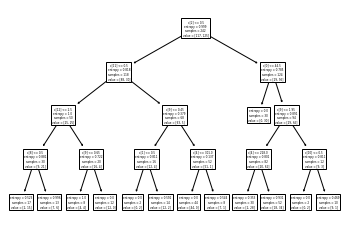

In [12]:
tree.plot_tree(drugTree)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [13]:
predTree = drugTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the predictions to the actual values.


In [14]:
print (predTree [0:5])
print (y_testset [0:5])


[0 1 1 1 0]
245    0
162    1
10     1
161    1
73     1
Name: output, dtype: int64


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8852459016393442
